# Assignment 1
Submitted by : Timothy Ng Tik Ti

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing¶

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.20.3
Numpy version=1.16.2
Pandas version=0.24.2
Matplotlib version=3.0.3
Python version=3.7.3


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv")
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dftest = pd.read_csv("test.csv")
dftest[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [6]:
#data statistics for both train and test data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dftest.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#to find out data missing from features
df.count()
#majorly cabin and age has missing data

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
dftest.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [10]:
#to find out correlation amongst features
df.corr()
#highest correlation is sibsp and parch, then followed by fare and pclass

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
# To analyse train and test data
print("Train Data")
minAge , maxAge = df['Age'].min(), df['Age'].max()
print('Age min : ' + str(minAge) + ' Age max : ' + str(maxAge))
print()
print('Survival numbers :')
print(df['Survived'].value_counts())
print()
print('Survival Rates :')
print(df['Survived'].value_counts() * 100 / len(df))
print()
print('Sex :')
print(df['Sex'].value_counts())
print()
print('Pclass :')
print(df['Pclass'].value_counts())
print()
# Test data
print("----------------------------------------")
print("Test Data")
print()
minAge , maxAge = dftest['Age'].min(), dftest['Age'].max()
print('Age min : ' + str(minAge) + ' Age max : ' + str(maxAge))
print()
print('Sex :')
print(dftest['Sex'].value_counts())
print()
print('Pclass :')
print(dftest['Pclass'].value_counts())

Train Data
Age min : 0.42 Age max : 80.0

Survival numbers :
0    549
1    342
Name: Survived, dtype: int64

Survival Rates :
0    61.616162
1    38.383838
Name: Survived, dtype: float64

Sex :
male      577
female    314
Name: Sex, dtype: int64

Pclass :
3    491
1    216
2    184
Name: Pclass, dtype: int64

----------------------------------------
Test Data

Age min : 0.17 Age max : 76.0

Sex :
male      266
female    152
Name: Sex, dtype: int64

Pclass :
3    218
1    107
2     93
Name: Pclass, dtype: int64


In [12]:
#Analysing feature Sex vs Survival rate
print('Statistics of Male who survived: ')
print(df[df['Sex'] == 'male']['Survived'].value_counts())
print()
print('Survival rate of males: ')
print(df[df['Sex'] == 'male']['Survived'].value_counts() * 100 / len(df[df['Sex'] == 'male']['Survived']))
print()
print('Statistics of Female who survived: ')
print(df[df['Sex'] == 'female']['Survived'].value_counts())
print()
print('Survival rate of females: ')
print(df[df['Sex'] == 'female']['Survived'].value_counts() * 100 / len(df[df['Sex'] == 'female']['Survived']))
#More of female survived than male

Statistics of Male who survived: 
0    468
1    109
Name: Survived, dtype: int64

Survival rate of males: 
0    81.109185
1    18.890815
Name: Survived, dtype: float64

Statistics of Female who survived: 
1    233
0     81
Name: Survived, dtype: int64

Survival rate of females: 
1    74.203822
0    25.796178
Name: Survived, dtype: float64



Distribution of ages of people who survived: 
(20, 30]    84
(30, 40]    69
(10, 20]    44
(0, 10]     38
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
Name: Age_Range, dtype: int64

Distribution of ages of people who died: 
(20, 30]    146
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: Age_Range, dtype: int64


C:\Users\ngtik\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\ngtik\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


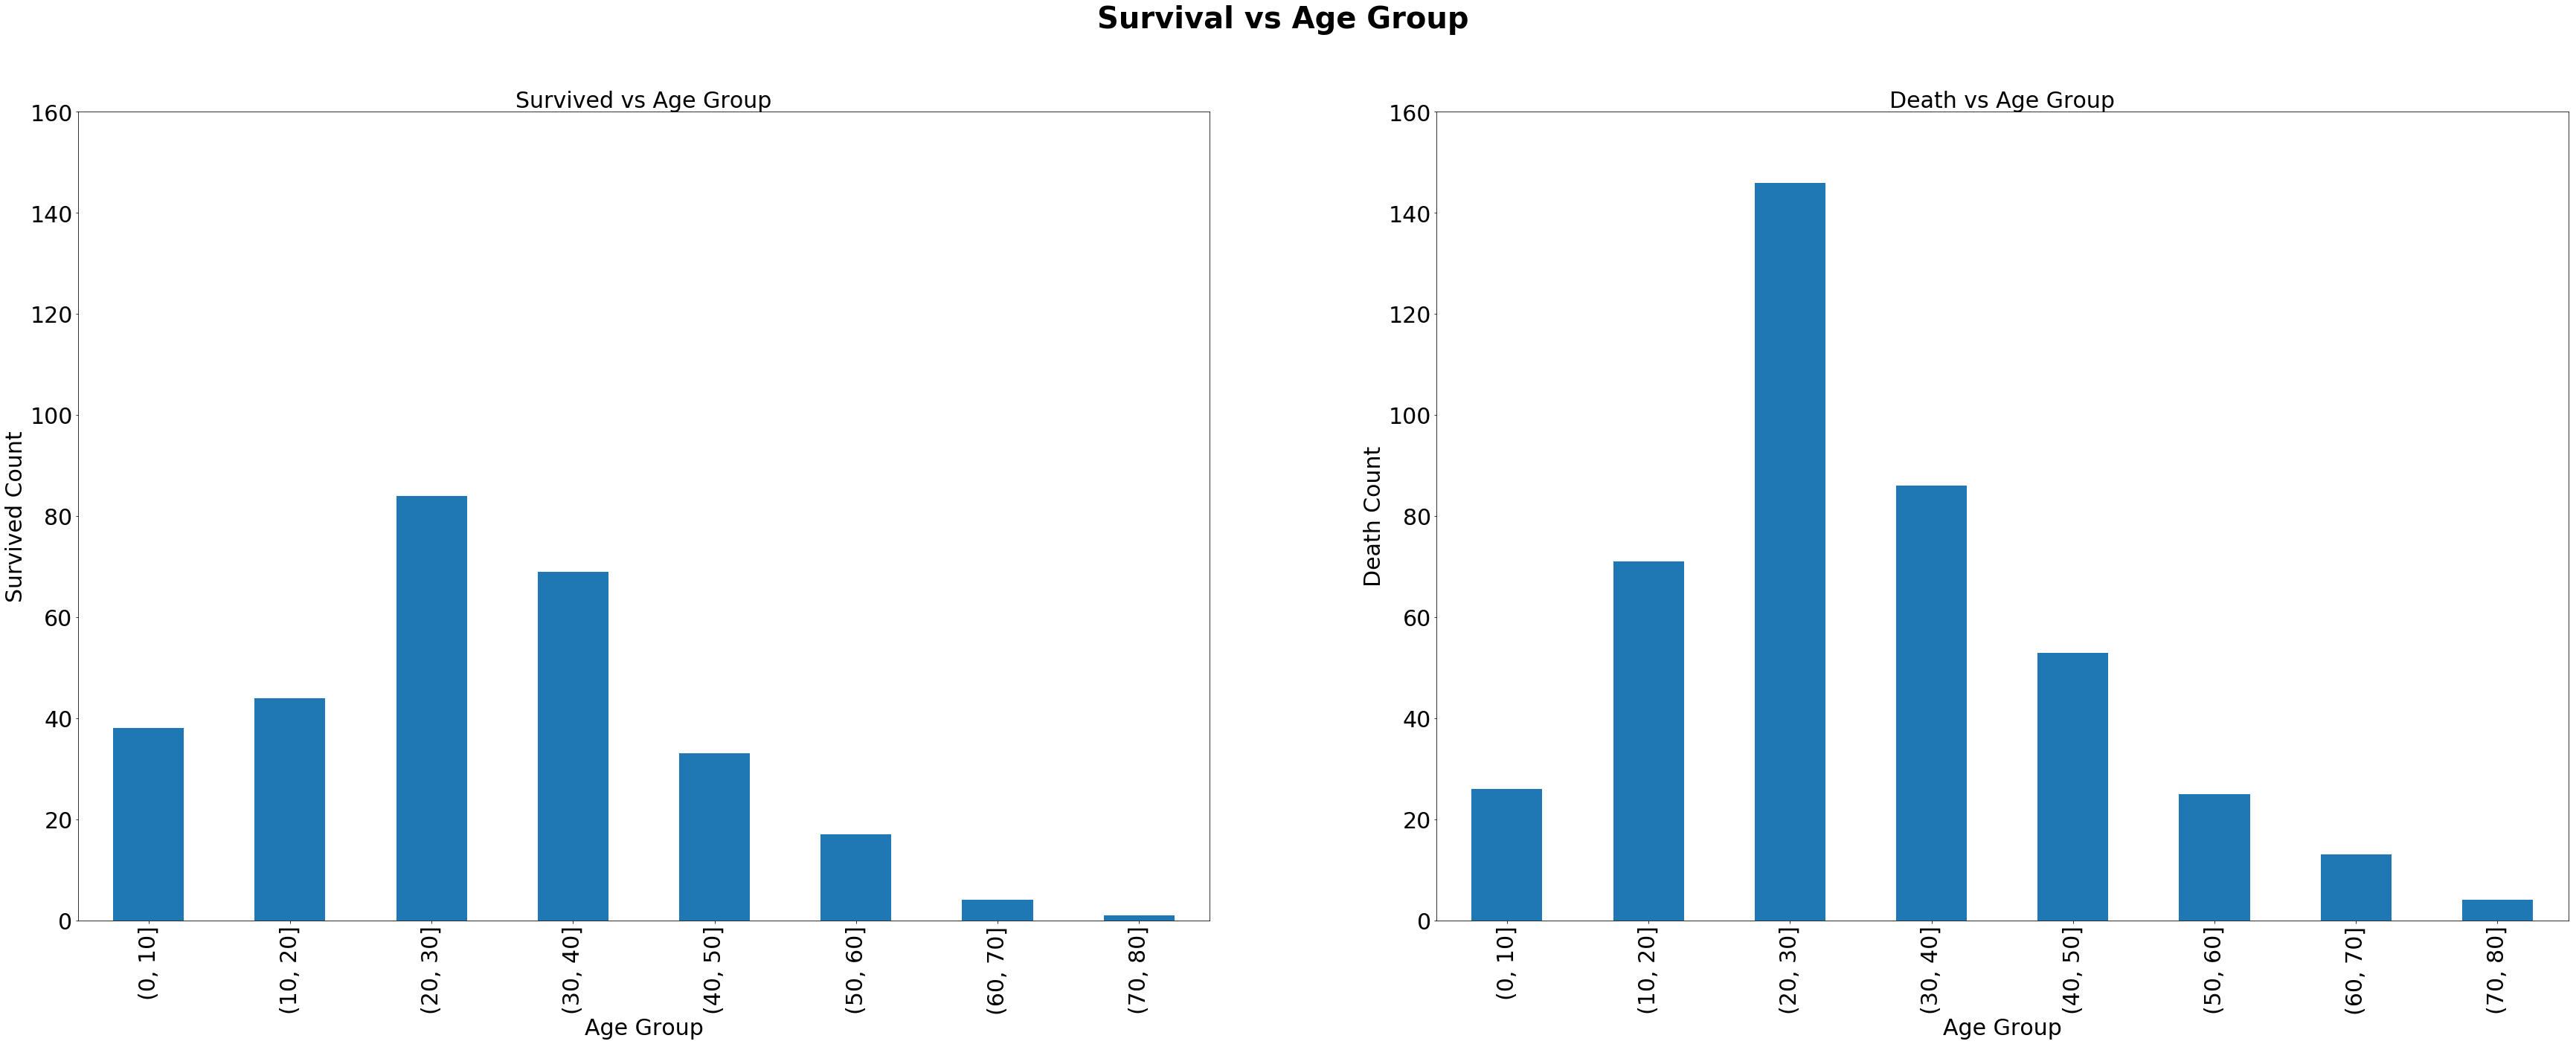

In [13]:
#Analysing feature Age vs survival rate
#As age is not discrete, we will round up the age to give it a range of 10 to lower the number of counters for 
#the feature Age
ranges = 0, 10, 20, 30 , 40, 50, 60 ,70 ,80
df['Age_Range'] = pd.cut(df['Age'], ranges)
print()
print('Distribution of ages of people who survived: ')
print(df[df['Survived'] == 1]['Age_Range'].value_counts())
print()
print('Distribution of ages of people who died: ')
print(df[df['Survived'] == 0]['Age_Range'].value_counts())

# Numerically, the dsitribution of ages across people who survived or not seems to be about the same. 
# We will plot a distribution graph to see it visually

# Ploting two figure side by side
fig = plt.figure(figsize=(60,20)) #  figure


fig.suptitle('Survival vs Age Group', fontsize=40, fontweight='bold')
ax1 = fig.add_subplot(121)
plt.ylim(0,160)
ax1.set_title('Survived vs Age Group', fontsize=30)
ax1.set_xlabel('Age Group', fontsize=30)
ax1.set_ylabel('Survived Count', fontsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)
ax2 = fig.add_subplot(122)
plt.ylim(0,160)
ax2.set_title('Death vs Age Group', fontsize=30)
ax2.set_xlabel('Age Group', fontsize=30)
ax2.set_ylabel('Death Count', fontsize=30)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.yaxis.set_tick_params(labelsize=30)

# Plot the survived in terms of Age group
plt.subplot(121) # 1st figure
df[df['Survived'] == 1]['Age_Range'].value_counts().sort_index().plot(kind='bar')

# Plot the not survived in terms of Age group
plt.subplot(122) # 2nd figure
df[df['Survived'] == 0]['Age_Range'].value_counts().sort_index().plot(kind='bar')

# As the distribution for both survived and non survived is similar, age may not be a feature with high weightage

In [14]:
# As seen from correlation, Pclass has decently high correlation with survival
# We will look at Pclass and survival in detail

print()
print('Distribution of Pclass of people who survived: ')
print(df[df['Survived'] == 1]['Pclass'].value_counts())
print()
print('Distribution of Pclass of people who died: ')
print(df[df['Survived'] == 0]['Pclass'].value_counts())

print()
print('Percentage of passengers who survived according to Pclass: ')
print()
print('Percentage of passengers who survived according to Pclass 1: ')
print(len(df[df['Pclass'] == 1][df['Survived']==1]['Survived'])*100/len(df[df['Pclass']==1]['Pclass']))
print()
print('Percentage of passengers who survived according to Pclass 2: ')
print(len(df[df['Pclass'] == 2][df['Survived']==1]['Survived'])*100/len(df[df['Pclass']==2]['Pclass']))
print()
print('Percentage of passengers who survived according to Pclass 3: ')
print(len(df[df['Pclass'] == 3][df['Survived']==1]['Survived'])*100/len(df[df['Pclass']==3]['Pclass']))

#as seen from the percentages, Pclass 1 passengers have higher survival rate than Pclass 2, 
#and Pclass 2 has higher rate than Pclass 3


Distribution of Pclass of people who survived: 
1    136
3    119
2     87
Name: Pclass, dtype: int64

Distribution of Pclass of people who died: 
3    372
2     97
1     80
Name: Pclass, dtype: int64

Percentage of passengers who survived according to Pclass: 

Percentage of passengers who survived according to Pclass 1: 
62.96296296296296

Percentage of passengers who survived according to Pclass 2: 
47.28260869565217

Percentage of passengers who survived according to Pclass 3: 
24.236252545824847


C:\Users\ngtik\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ngtik\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\ngtik\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


# Data Preparation

In [15]:
#Next as there are data missing, we will have to prepare the data frame
# First, we will be processing age feature from the train model as it has 177 missing entries
# not a small number, so we will be replacing with the mean

print(df['Age'].isnull().sum())
# replace nulls with the mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

df.count()

177


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Age_Range      714
dtype: int64

In [16]:
# Next we will prepare the Embarked feature as its missing 2 values
# This is a small number. Simply replacing them with the mode value for embarked 

print(df['Embarked'].isnull().sum())
# replace nulls with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.count()

2


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
Age_Range      714
dtype: int64

In [17]:
# As Cabin has a huge number of missing values, in both train and 
# test data set , we will be dropping this feature column
# We will be dropping PassengerId, Name and Ticket Number will not make sense 
# as factors affecting the survival rate

df = df.drop(['PassengerId','Name','Ticket','Cabin','Age_Range'], axis=1)

df.count()
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [18]:
# Since, sklearn requires all inputs to be numeric, we should convert all 
# our categorical variables into numeric by encoding the categories. Before
# that we will fill all the missing values in the dataset. This can be done 
# using the following code: 

# For train data
from sklearn.preprocessing import LabelEncoder
var_mod = ['Pclass','Sex','Embarked']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 
df.head(10)

# for Sex, male = 1, female = 0
# for Pclass, 1,2,3 = 0,1,2 respectively
# for Embarked, C,Q,S = 0,1,2 respectively

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.000000,1,0,7.2500,2
1,1,0,0,38.000000,1,0,71.2833,0
2,1,2,0,26.000000,0,0,7.9250,2
3,1,0,0,35.000000,1,0,53.1000,2
4,0,2,1,35.000000,0,0,8.0500,2
5,0,2,1,29.699118,0,0,8.4583,1
6,0,0,1,54.000000,0,0,51.8625,2
7,0,2,1,2.000000,3,1,21.0750,2
8,1,2,0,27.000000,0,2,11.1333,2
9,1,1,0,14.000000,1,0,30.0708,0


# Train Model

## Split Data into Train and Test Sets

In [34]:
from sklearn.model_selection import train_test_split
y = df["Survived"].values
X = df.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train Model with Algorithm: 

In [35]:
# Train Model with Logistics Regression
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()

# Applying Grid Search to find the best model and the best parameters for our clr
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'dual': [0,1],'fit_intercept':[0,1]}]
             
grid_search_clr = GridSearchCV(estimator = clr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_clr=grid_search_clr.fit(X_train, y_train)
grid_search_clr.best_params_

#clr.fit(X_train,y_train)
#clr

C:\Users\ngtik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'dual': 0, 'fit_intercept': 1}

In [36]:
# Train Model with SVC
from sklearn.svm import SVC

csvc = SVC()
# Applying Grid Search to find the best model and the best parameters for our csvc
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10], 'kernel': ['linear','rbf']}]
         
grid_search_csvc = GridSearchCV(estimator = csvc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_csvc = grid_search_csvc.fit(X_train, y_train)
grid_search_csvc.best_params_

{'C': 1, 'kernel': 'linear'}

# Score and Evaluate Model¶

## Score Model and Evaluate Model with:  

In [37]:
# score logistic regression model for test set - 1
y_hat= grid_search_clr.predict(X_test)

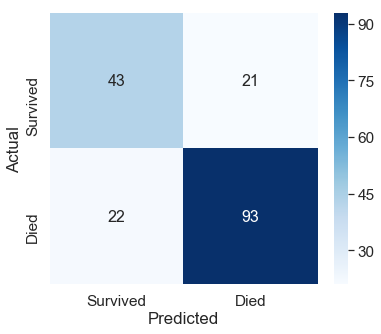

In [38]:
# score logistic regression model for test set - 2
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size



Accuracy 0.7597765363128491


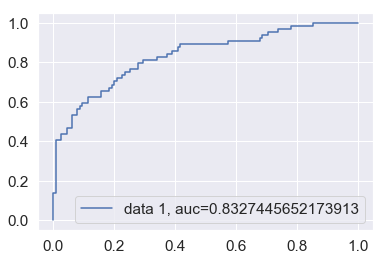

In [39]:
# score logistic regression model for test set - 3
# Accuracy, ROC, AUC for model evaluation
print("Accuracy", metrics.accuracy_score(y_test, y_hat))

y_hat_proba = grid_search_clr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_hat_proba)
auc = metrics.roc_auc_score(y_test, y_hat_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#model seems satisfactory

In [40]:
# score svc for test set - 1
y_hat2= grid_search_csvc.predict(X_test)

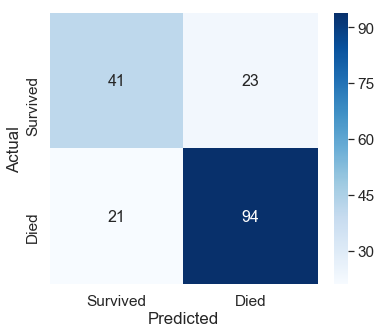

In [41]:
# score svc for test set - 2
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat2, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [42]:
# score svc for test set - 3
# Accuracy, ROC, AUC for model evaluation
print("Accuracy", metrics.accuracy_score(y_test, y_hat2))

#y_hat_proba2 = grid_search_csvc.predict_proba(X_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_hat_proba2)
#auc = metrics.roc_auc_score(y_test, y_hat_proba2)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

#model seems satisfactory

Accuracy 0.7541899441340782


# Submitting to Kaggle

The stupid baseline is based on the majority of *Survived* status. In which case, we will have a rule which states that everybody died in the Titanic. 

In [43]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = dftest[["PassengerId"]]
dfout["Survived"] = 0
dfout[:5]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [44]:
dfout.to_csv("stupidbaseline.csv",index=False)

In [45]:
#Next we will perform data preparation for test.csv
# And drop columns that doesn't matter
dftest2 = dftest.drop(["PassengerId","Name","Ticket", "Cabin"],axis=1)

print(dftest.isnull().sum())
# First, we will be processing age feature from the train model as it has  missing entries
# not a small number, so we will be replacing with the mean
# replace nulls with the mean value
dftest2['Age'].fillna(df['Age'].mean(), inplace=True)
dftest2['Fare'].fillna(df['Fare'].mean(), inplace=True)


dftest2.head(2)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [46]:
# Since, sklearn requires all inputs to be numeric, we should convert all 
# our categorical variables into numeric by encoding the categories. Before
# that we will fill all the missing values in the dataset

# For train data
from sklearn.preprocessing import LabelEncoder
var_mod = ['Pclass','Sex','Embarked']
le = LabelEncoder()
for i in var_mod:
    dftest2[i] = le.fit_transform(dftest2[i])
 

# for Sex, male = 1, female = 0
# for Pclass, 1,2,3 = 0,1,2 respectively
# for Embarked, C,Q,S = 0,1,2 respectively



dftest2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2
5,2,1,14.0,0,0,9.2250,2
6,2,0,30.0,0,0,7.6292,1
7,1,1,26.0,1,1,29.0000,2
8,2,0,18.0,0,0,7.2292,0
9,2,1,21.0,2,0,24.1500,2


In [47]:
Xp = dftest2.values
Xp[:2]

array([[ 2.    ,  1.    , 34.5   ,  0.    ,  0.    ,  7.8292,  1.    ],
       [ 2.    ,  0.    , 47.    ,  1.    ,  0.    ,  7.    ,  2.    ]])

In [48]:
#Next we will predict with our Logistic Regression Trained Model as it has higher accuracy score
yp_hat = grid_search_clr.predict(Xp)

In [49]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = dftest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [50]:
dfout.to_csv("lrpredict.csv",index=False)

# Conclusions

Conclusions:

Prediction task is defined as predicting the survival based on the features, as such, the output variable is survived.

To determine and process the features, we used correlation to determine if they are dependent on each other, or with Survived label. We removed features that are highly correlated with each other, and with very low correlation with Survived, to train a model with better accuracy.

Since the model is all numeric for sklearn, we did some processing to make it all numeric with no null values.

In order to decide which learning algorithm to use, since the prediction task is categorial in nature, we will use classfication models. In this assignment, we used logistic regression as well as SVC model.

Based on the accuracy values, after tuning our hyperparameters using GridSearchCV function, logistic regression model seemed to have a slight edge compared to SVC model. The logistic regression system is better than stupid baseline as the Kaggle score value of our logistic model is 0.77 while for stupid baseline its 0.6.

However, the score was 0.77, which means there is error for the system. One potential reason for this is that there are potentially other factors affecting the survival rate other than the features input into the system. We could do further testing with hyperparameters, and further testing with other features to come up with a more robust system
